In [2]:
import plotly.express as px
import pandas as pd
import os

fp = os.getcwd().replace(r"\plotly", "") + r"\data"

# necessary for github
import plotly.io as pio
pio.renderers.default = "svg"

# Dataset 1
titanic = pd.read_csv(fp + r"\titanic_train.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Dataset 2
gdp = pd.read_csv(fp + r"\gdp.csv")
gdp.head(3)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10


# Basics

In [4]:
# Creating a generic Function, so the images always have the same size
def image_size(fig):
    fig.update_layout(
        autosize = False,
        width = 800,
        height = 400)

### Line Plot

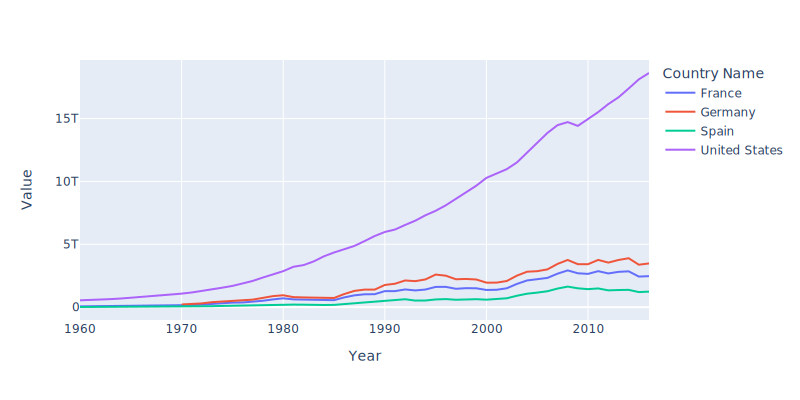

In [5]:
# Defining Data
data = gdp.loc[gdp["Country Name"].isin(["United States", "Germany", "France", "Spain", "Russia"])]

# Creating Plot
fig = px.line(data, x = "Year", y = "Value", color = "Country Name")


image_size(fig)
fig.show()

### Bar Plot

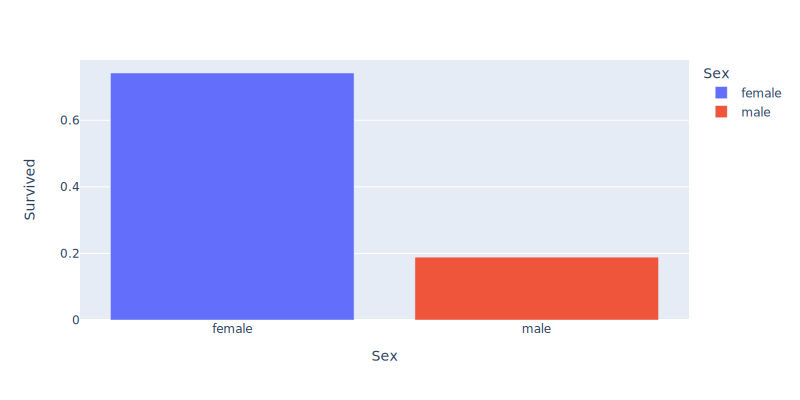

In [6]:
# Defining Data
data = titanic.pivot_table(
        values = "Survived",
        index = "Sex",
        aggfunc = "mean").reset_index()

# Creating plot
fig = px.bar(data, x = "Sex", y = "Survived", color = "Sex")

image_size(fig)
fig.show()

### Scatter Plot

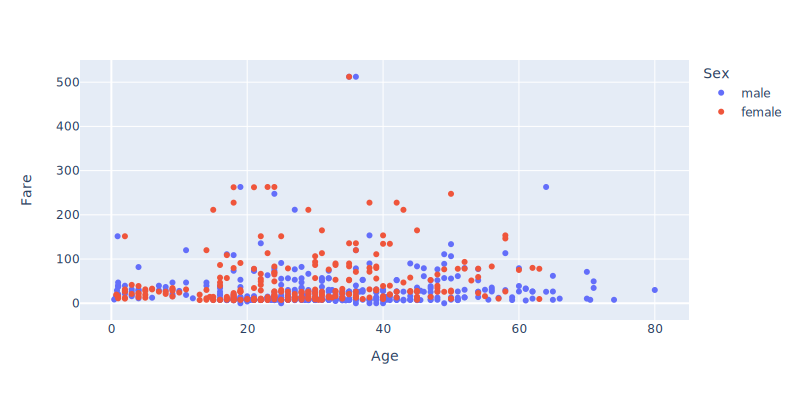

In [7]:
fig = px.scatter(titanic, x = "Age", y = "Fare", color="Sex")

image_size(fig)
fig.show()

### Pie Chart

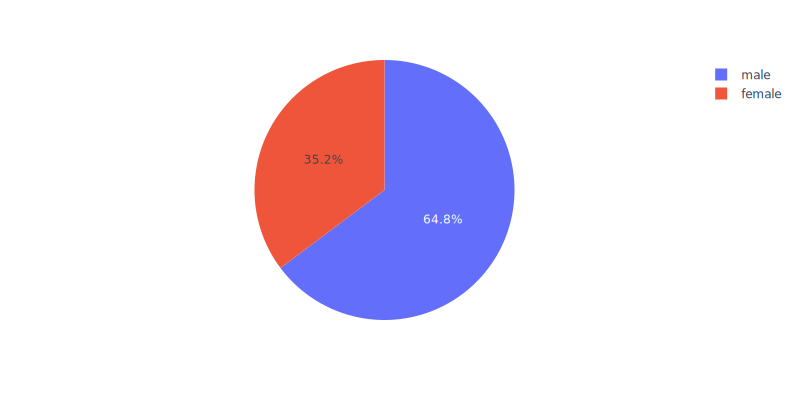

In [8]:
fig = px.pie(titanic, "Sex")

image_size(fig)
fig.show()

# Advanced

### Boxplot

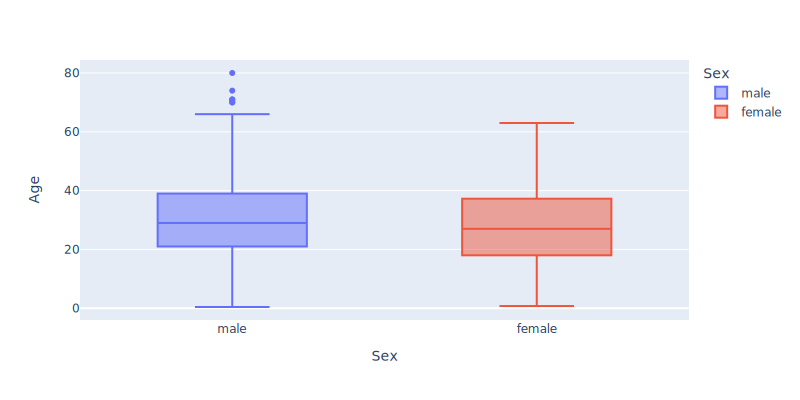

In [9]:
fig = px.box(titanic, y = "Age", x = "Sex", color = "Sex")

image_size(fig)
fig.show()

### Heatmap

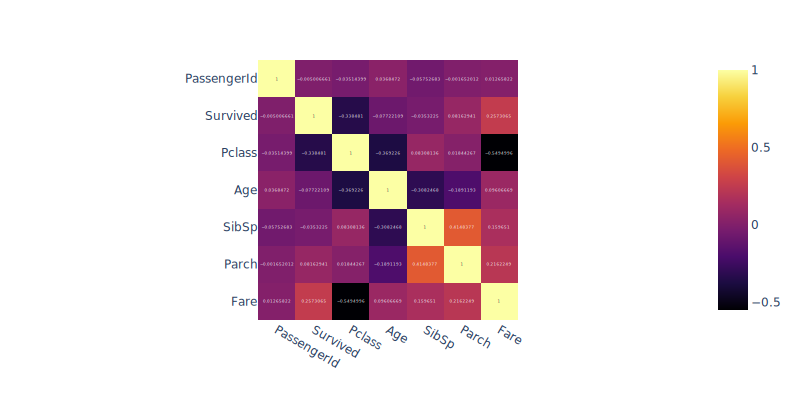

In [19]:
data = titanic.corr()

fig = px.imshow(data, text_auto = True, color_continuous_scale='Inferno')

image_size(fig)
fig.show()

### Scatter Matrix

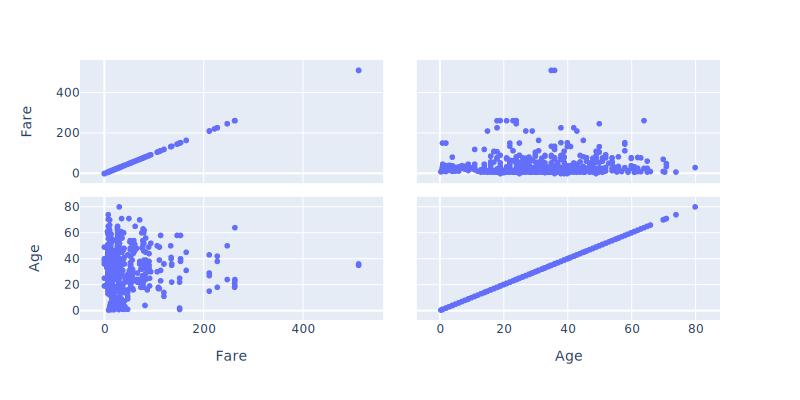

In [11]:
data = titanic[["Fare", "Age"]]

fig = px.scatter_matrix(data)

image_size(fig)
fig.show()

# Styling

In [12]:
fig = px.scatter(titanic, x = "Age", y = "Fare", color="Sex")
image_size(fig)

### Plot axis and Legend

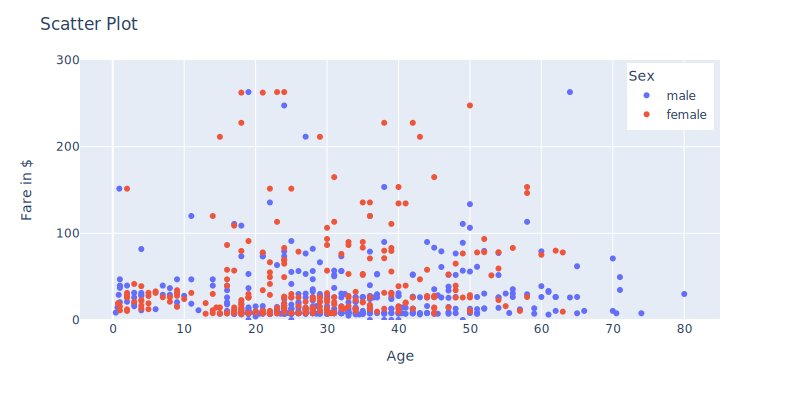

In [13]:
# We can either use methods directly (like x_axis_range) or use a dict for it (like xaxis = dict(dtick = 5))

fig.update_layout(
    title = "Scatter Plot",                   # Plot Attributes
    
    yaxis = dict(                             # Range attributes
        range = [0, 300],                     
        dtick = 100,                          
        title =  "Fare in $"  
    ),
    
    legend = dict(
        yanchor = "top",
        xanchor = "right",
        y = 0.99,
        x = 0.99
    )

)

### Plot annotation

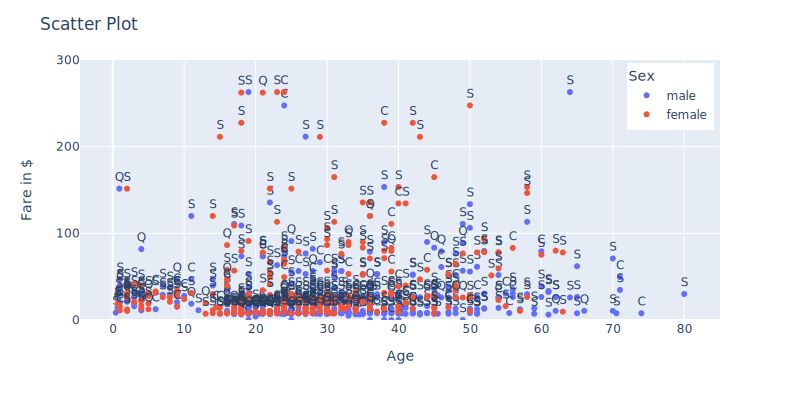

In [14]:
fig.update_traces(
    mode = "markers+text",
    text = titanic["Embarked"],
    textposition = "top center"
)

### Plot style

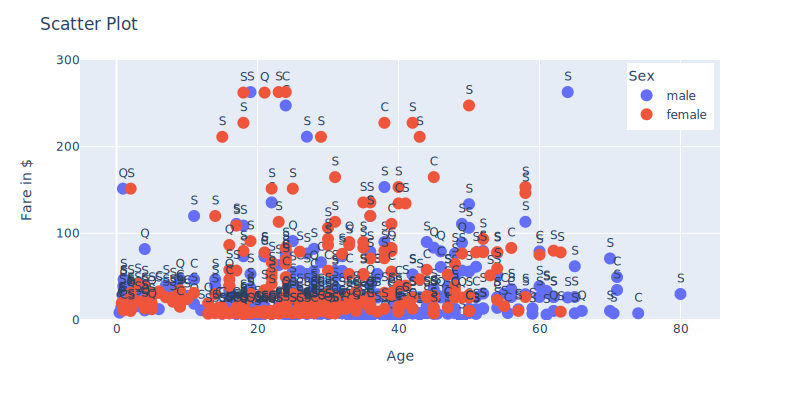

In [15]:
# Defining Data and Figure
fig.update_traces(
    marker = dict(                        # marker for scatter
        size = 12
    ),

    line = dict(                          # line for line plots (lines are disabled in this figure)                
        width = 5
    ),
    
#    width = 0.5                         # just width for bar plots (commented cause not available for scatters)
)

### Subplots

The subplot method doesn't work in plotly express, only in plotly Go. But there are two ways to trick plotly express to use subplots:
1) Facet Col/Row: only works for the same plot types
2) Subplots (using Go method for express)

In [16]:
# Defining Data
data = gdp.loc[gdp["Country Name"].isin(["United States", "Germany", "France", "Spain", "Russia"])]

#### 1) Facet Col/Row

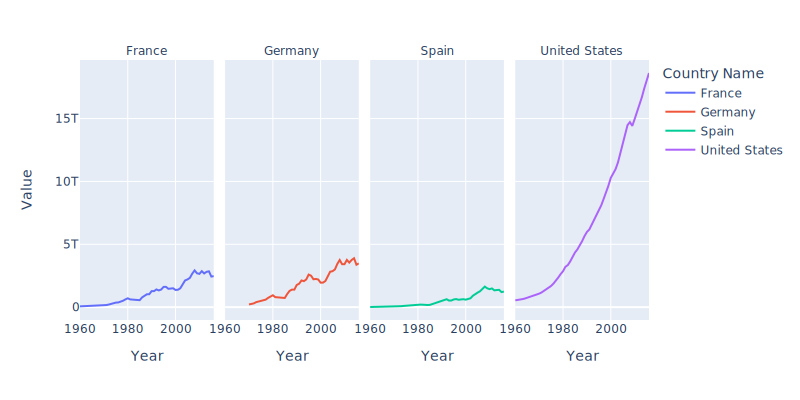

In [17]:
fig = px.line(data, x = "Year", y = "Value", color = "Country Name", facet_col = "Country Name")            # same for facet_row
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

image_size(fig)
fig.show()

#### 2) Subplots

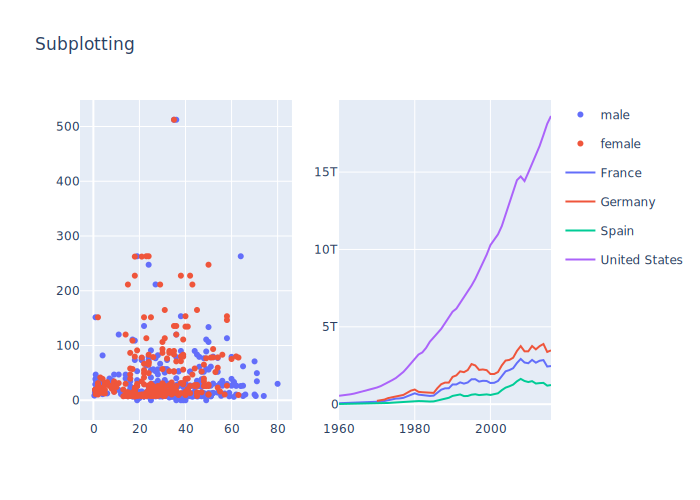

In [18]:
import plotly.subplots as sp

# Creating Plots
fig1 = px.scatter(titanic, x = "Age", y = "Fare", color="Sex")
fig2 = fig = px.line(data, x = "Year", y = "Value", color = "Country Name") 

# Extracting traces from plots
fig1_traces = []
fig2_traces = []

for trace in range(len(fig1["data"])):
    fig1_traces.append(fig1["data"][trace])
    
for trace in range(len(fig2["data"])):
    fig2_traces.append(fig2["data"][trace])

# Create subplot
fig = sp.make_subplots(rows = 1, cols = 2)

# Get the extracted traces and add to subplots
for traces in fig1_traces:
    fig.append_trace(traces, row = 1, col = 1)
    
for traces in fig2_traces:
    fig.append_trace(traces, row = 1, col = 2)

    
fig.update_layout(
    title = "Subplotting"
)
fig.show()